# Imaging Concordance Summary Statistics

### **Overview**

Calculates summary statistics for each imaging modality:

- **Total scans performed**
- **Number of concordant scans**
- **Concordance rate (%)**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

preop_imaging_df = pd.read_excel('../Data/final_cleaned_with_concordance.xlsx')
side_inclusive_df = pd.read_excel('../Data/side_concordance_results.xlsx')

In [5]:
preop_imaging_df.head()

,Date of Procedure,Patient ID,Age,Gender,Surgical Findings,Surgical Cure,SPECT/CT,Ultrasound,4D CT Scan,Sestamibi,MRI,ultrasound_concordance,spectct_concordance,4d_ct_scan_concordance,sestamibi_concordance,mri_concordance
0,2012-04-24,156895,77,F,Right Inferior,Yes,NaN,NaN,NaN,Right Inferior,Right Inferior,No Scan,No Scan,No Scan,Yes,Yes
1,2012-05-08,182059,70,F,Left Inferior,Yes,NaN,Non-localizing,NaN,Non-localizing,Right Inferior,No,No Scan,No Scan,No,No
2,2012-05-22,150593,65,F,Left Inferior,Yes,NaN,Left Inferior,NaN,Left Inferior,NaN,Yes,No Scan,No Scan,Yes,No Scan
3,2012-07-03,183346,69,F,"Left Superior, Right Superior",Yes,NaN,NaN,NaN,Left Inferior,Non-localizing,No Scan,No Scan,No Scan,No,No
4,2012-07-18,183255,74,F,Left Superior,Yes,NaN,Left,NaN,Left,NaN,No,No Scan,No Scan,No,No Scan


In [6]:
# define the imaging modalities as a list 
modalities = ['Ultrasound', 'SPECT/CT', '4D CT Scan', 'Sestamibi', 'MRI']

# create an empty list to store the results 
summary_results = []

In [7]:
summary_results = []
for modality in modalities:
    concord_col = modality + '_Concordance'
    
    performed_scans = side_inclusive_df[side_inclusive_df[concord_col] != 'No Scan']
    
    total_scans = performed_scans.shape[0]
    
    concordant_scans = performed_scans[
        performed_scans[concord_col].isin(['Yes (Exact)', 'Yes (Side)'])
    ].shape[0]
    
    if total_scans > 0:
        concordance_rate = (concordant_scans / total_scans) * 100
    else:
        concordance_rate = None 
        
    summary_results.append({
        'Modality': modality,
        'Total Scans': total_scans,
        'Concordant Scans': concordant_scans,
        'Concordance Rate (%)': round(concordance_rate, 2) if concordance_rate is not None else None
    })
summary_df = pd.DataFrame(summary_results)
display(summary_df)
summary_df

,Modality,Total Scans,Concordant Scans,Concordance Rate (%)
0,Ultrasound,145,73,50.34
1,SPECT/CT,230,160,69.57
2,4D CT Scan,228,138,60.53
3,Sestamibi,174,115,66.09
4,MRI,15,6,40.00


,Modality,Total Scans,Concordant Scans,Concordance Rate (%)
0,Ultrasound,145,73,50.34
1,SPECT/CT,230,160,69.57
2,4D CT Scan,228,138,60.53
3,Sestamibi,174,115,66.09
4,MRI,15,6,40.00


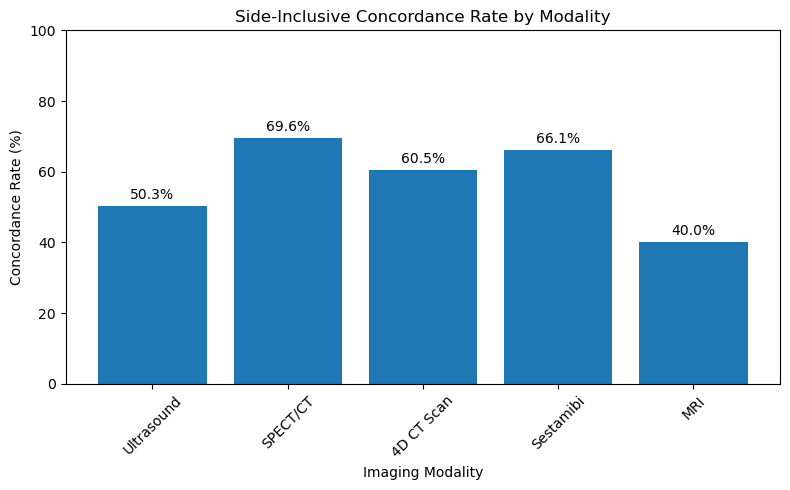

In [8]:
# creating plot 
plt.figure(figsize=(8,5))
bars = plt.bar(summary_df['Modality'], summary_df['Concordance Rate (%)'])

# adding value labels on top of bars 
for bar in bars: 
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0,3),  # offset label upwards
            textcoords="offset points",
             ha='center', va='bottom')
   
# Labels and title
plt.ylabel('Concordance Rate (%)')
plt.xlabel('Imaging Modality')
plt.title('Side-Inclusive Concordance Rate by Modality')
plt.ylim(0,100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
side_inclusive_df

,Procedure_Date,Patient_ID,Age,Gender,Surgical_Findings,Surgical Cure,SPECT/CT,Ultrasound,4D CT Scan,Sestamibi,MRI,Ultrasound_Concordance,SPECT/CT_Concordance,4D CT Scan_Concordance,Sestamibi_Concordance,MRI_Concordance
0,2012-04-24,156895,77,F,Right Inferior,Yes,NaN,NaN,NaN,Right Inferior,Right Inferior,No Scan,No Scan,No Scan,Yes (Exact),Yes (Exact)
1,2012-05-08,182059,70,F,Left Inferior,Yes,NaN,Non-localizing,NaN,Non-localizing,Right Inferior,No,No Scan,No Scan,No,No
2,2012-05-22,150593,65,F,Left Inferior,Yes,NaN,Left Inferior,NaN,Left Inferior,NaN,Yes (Exact),No Scan,No Scan,Yes (Exact),No Scan
3,2012-07-03,183346,69,F,"Left Superior, Right Superior",Yes,NaN,NaN,NaN,Left Inferior,Non-localizing,No Scan,No Scan,No Scan,Yes (Side),No
4,2012-07-18,183255,74,F,Left Superior,Yes,NaN,Left,NaN,Left,NaN,Yes (Side),No Scan,No Scan,Yes (Side),No Scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2025-04-29,310063,48,M,"Left Superior, Right Superior",Yes,"Left, Right","Left Inferior, Right Inferior",NaN,NaN,NaN,Yes (Side),Yes (Side),No Scan,No Scan,No Scan
401,2025-04-29,311569,47,F,Right Inferior,Yes,Right Inferior,NaN,Right Inferior,NaN,NaN,No Scan,Yes (Exact),Yes (Exact),No Scan,No Scan
402,2025-05-06,309738,73,F,Right Inferior,Yes,Right Inferior,Non-localizing,"Left Superior, Right Inferior",NaN,NaN,No,Yes (Exact),No,No Scan,No Scan
403,2025-05-13,194173,73,F,"Left Inferior, Right Superior, Right Inferior",Yes,Right Superior,Non-localizing,Right,NaN,NaN,No,No,No,No Scan,No Scan
